output_path=c:\gits\SMILE_server\app/outputs/2024-08-07-00-05-46.png
SMILE_init
臉中線斜率m=2.067796610170784
boximg ok

image 1/1 c:\gits\SMILE_server\app\outputs\2024-08-07-00-05-46.png: 192x640 17 tooths, 106.1ms
Speed: 1.0ms preprocess, 106.1ms inference, 5.5ms postprocess per image at shape (1, 3, 192, 640)
incisor_lower_border-intercanine_line=-0.011005000000000043
mouse_lower_border-intercanine_line=0.008234999999999992
All tooth found and img output


{'image': {'width': 1024, 'height': 1024},
 'date': '2024-08-07 00:05:46',
 'error': [],
 'mouth': [[0.39078, 0.69439],
  [0.40835, 0.70904],
  [0.42305, 0.7178],
  [0.44367, 0.72471],
  [0.46834, 0.72882],
  [0.49757, 0.72994],
  [0.52846, 0.72724],
  [0.5543, 0.72172],
  [0.57603, 0.71368],
  [0.59205, 0.70416],
  [0.61128, 0.68859],
  [0.5965, 0.68886],
  [0.57882, 0.68957],
  [0.55766, 0.69072],
  [0.53147, 0.6927],
  [0.49942, 0.69496],
  [0.46882, 0.69368],
  [0.44342, 0.69272],
  [0.4229, 0.69256],
  [0.40526, 0.69305]],
 'mouth_box': [0.39078, 0.61128, 0.68859, 0.72994],
 'tooth_boxes': [[0.48887, 0.7021, 0.0293, 0.0172],
  [0.51969, 0.70252, 0.02726, 0.0156],
  [0.49407, 0.7181, 0.01892, 0.01372],
  [0.47297, 0.7166, 0.01838, 0.01484],
  [0.46248, 0.69988, 0.01943, 0.01626],
  [0.56841, 0.69755, 0.0169, 0.01314],
  [0.51468, 0.71587, 0.01812, 0.01017],
  [0.45137, 0.71578, 0.01888, 0.01789],
  [0.43842, 0.70008, 0.02182, 0.01844],
  [0.58401, 0.69185, 0.01331, 0.0087],
  [0.54

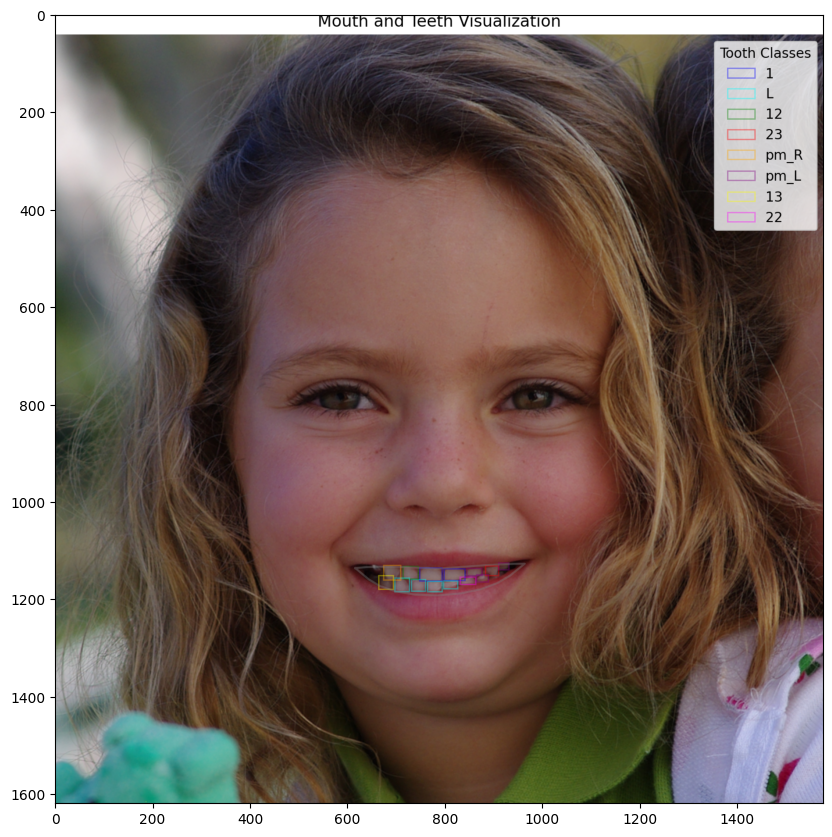

In [2]:
import matplotlib.pyplot as plt
from lib.Smile import SMILE

input_path = "input.png"

image = plt.imread(input_path)


# 顯示背景圖片
nowfig=SMILE(input_path, device='cuda',filter=0.9)

nowfig.find_all_tooth()
nowfig.draw_result()

plt.imshow(plt.imread(nowfig.output_path))
nowfig.smile_info

In [7]:
import secrets
secret_key = secrets.token_hex(24)
print(secret_key)

9069a7cb81abd236d622abf1e271b7f08b5b3d0f8c9ca7b7
